# Bertrand's box paradox

Sometimes even when a logically sound analytical solution is found for a problem skepticism remains. Thus, empirical simulation can be a useful tool to verify results. Bertrand's box paradox is one such example. 

There are three boxes:

- a box containing two gold coins,
- a box containing two silver coins,
- a box containing one gold coin and a silver coin.

The 'paradox' is in the probability, after choosing a box at random and withdrawing one coin at random, if that happens to be a gold coin, of the next coin drawn from the same box also being a gold coin.

A quick python script can easily simulate this game. We will write the game very explicitly such that the game is clear. However, this code can be significantly optimized.

In [208]:
def BertrandsBox():
    # Initialize the boxes as
    # 0 - is a silver coin
    # 1 - is a gold coin
    boxes = {0: [0,0],
             1: [0,1],
             2: [1,1]}
    
    # Randomly select a box
    box_pick = np.random.choice([0,1,2])
    box = boxes[box_pick]
    
    # Pick a coin from the box
    # Then take the remaining one
    pick = np.random.randint(0, len(box))
    first_pick = box[pick]
    second_pick = box[1-pick]
    
    # Check if successful
    # -1: The initial condition is not met
    #  0: The initial condition is met but not the second
    #  1: Both the initial and second condition are met
    if first_pick == 0:    return -1
    elif second_pick == 1: return 1
    else:                  return 0

In [209]:
BertrandsBox()

1

A quick python script can easily simulate this game thousands of times and get a solid probability for this paradox in expectation. When trying to convince people through simulation it is often wise to be explicit in describing the game to avoid confusion when presenting results.

In [213]:
import numpy as np

# Initialize the outcomes
success = 0                 # 2 gold coins found
good_trials = 0             # 1 gold coin found (1st condition satisfied)

# The number of times we want to repeat the event
n_trials = 10000

for i in range(0, n_trials):
    game_result = BertrandsBox()
    if game_result == -1: continue
    elif game_result == 1: success += 1
    good_trials += 1
        
# Print the probability of both coins being gold given the first ball
# picked was gold.
print(success/good_trials)        

0.6628628628628629


The greater the number of times we repeat the event the more accurate our estimate will be. We can see how the number of trials affects the outcomes.

Result:  0.6669471235515834


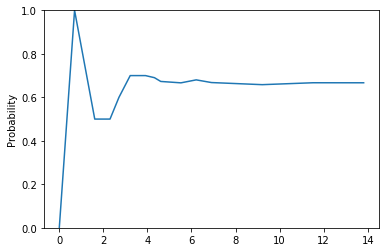

In [218]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_tries = [1,2,5,10,15,25,50,75,100,250,500,1000,10000, 100000, 1000000];
results = []

for j in range(0, len(num_tries)):
    # Initialize the outcomes
    success = 0                 # 2 gold coins found
    good_trials = 0             # 1 gold coin found (1st condition satisfied)

    for i in range(0, num_tries[j]):
        game_result = BertrandsBox()
        # If the first condition is not met
        if game_result == -1: continue
        # If the game is a success
        elif game_result == 1: success += 1
        good_trials += 1
    
    if good_trials == 0: results.append(0)
    else: results.append(success/good_trials)

print('Result: ', results[-1])
plt.plot(np.log(num_tries), results)
plt.ylim(0, 1.0)
plt.ylabel('Probability')
plt.show()

# Boxes with labels

If I have 12 boxes, in order of #1 to #12, and I close my eyes and stick a known label (A to L) on a random box, what is the probability that I get zero correct labels on the corresponding boxes?

0.375164


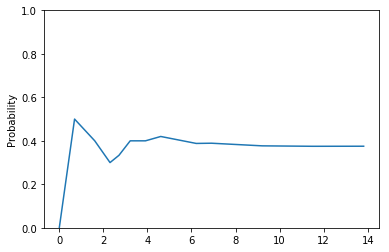

In [234]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_tries = [1,2,5,10,15,25,50,100,500,1000,10000, 100000, 1000000]
#num_tries = [1,2,3,5,100,1000,10000]

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x = [1,2,3,4]

results = []

for j in range(0, len(num_tries)):
    success = 0
    trials = 0
    
    for i in range(0,num_tries[j]):
        trials += 1
        y = np.random.permutation(len(x)) + 1
        if not 0 in x-y: success += 1
    results.append(success/trials)

print(results[-1])
plt.plot(np.log(num_tries), results)
plt.ylim(0, 1.0)
plt.ylabel('Probability')
plt.show()

# Monty Hall Game

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

0.666903


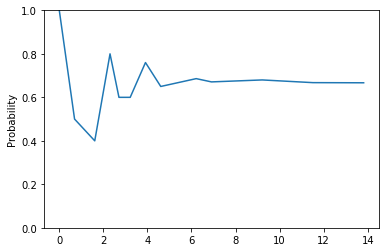

In [255]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_tries = [1,2,5,10,15,25,50,100,500,1000,10000, 100000, 1000000]
#num_tries = [1, 5, 1000, 10000]

results = []

for j in range(0, len(num_tries)):
    decision = 'switch' # 'switch', 'stay'
    num_doors = 3
    
    success = 0
    trials = 0
    
    for i in range(0,num_tries[j]):
        trials += 1
        
        # Set up the doors and put a prize randomly behind one
        doors = np.zeros((num_doors,1))
        doors[np.random.choice(range(num_doors))] = 1
        
        # Pick a random door
        door_picked = np.random.randint(0, high=num_doors, size=1)
        
        if(decision == 'stay'):
            if(doors[door_picked] == 1): success += 1
        if(decision == 'switch'):
            if(not doors[door_picked] == 1): success += 1        
    results.append(success/trials)

print(results[-1])
plt.plot(np.log(num_tries), results)
plt.ylim(0, 1.0)
plt.ylabel('Probability')
plt.show()